Assignment 1b

In [89]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import salem
import cartopy.crs as ccrs
import pandas as pd

In [90]:
us = xr.open_dataset("/mnt/Metservice_WRF/U_20200101000000.nc")

In [91]:
vs = xr.open_dataset("/mnt/Metservice_WRF/V_20200101000000.nc")

Q.1

In [92]:
us["U"]

<xarray.DataArray 'U' (height: 10, time: 744, lat: 508, lon: 472)>
[1783933440 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 10.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0

In [93]:
u = us["U"]

In [94]:
vs["V"]

<xarray.DataArray 'V' (height: 10, time: 744, lat: 508, lon: 472)>
[1783933440 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 10.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0

In [95]:
v = vs["V"]

In [96]:
ws = np.sqrt(v**2+u**2)

In [97]:
ws

<xarray.DataArray (height: 10, time: 744, lat: 508, lon: 472)>
array([[[[ 7.213507 ,  7.22648  ,  7.2078447, ...,  8.798541 ,
           8.789    ,  8.765056 ],
         [ 7.150364 ,  7.1571054,  7.1390543, ...,  8.770625 ,
           8.752463 ,  8.737022 ],
         [ 7.0775585,  7.0883613,  7.0796394, ...,  8.73932  ,
           8.7343   ,  8.718769 ],
         ...,
         [ 1.3592656,  1.1885601,  1.3020595, ...,  5.709315 ,
           5.7481575,  5.787598 ],
         [ 1.677812 ,  1.6238198,  1.6930673, ...,  5.737377 ,
           5.776343 ,  5.815848 ],
         [ 1.9264045,  1.9891632,  2.0800462, ...,  5.766178 ,
           5.8057637,  5.8350773]],

        [[ 6.5536466,  6.559438 ,  6.5524445, ...,  8.747442 ,
           8.746467 ,  8.758582 ],
         [ 6.44897  ,  6.45447  ,  6.450703 , ...,  8.727585 ,
           8.735631 ,  8.730821 ],
         [ 6.345168 ,  6.3535833,  6.3565145, ...,  8.721712 ,
           8.721541 ,  8.716076 ],
...
         [ 2.912981 ,  3.1858273,  3.1231072, ...,  7.284052 ,
           7.2781777,  7.285946 ],
         [ 2.834608 ,  2.9272382,  2.6133497, ...,  7.3131213,
           7.321974 ,  7.323542 ],
         [ 2.6891794,  2.4549742,  2.0336208, ...,  7.3577404,
           7.3661456,  7.3675313]],

        [[25.414265 , 25.376265 , 25.338099 , ..., 16.128422 ,
          15.8591175, 15.671163 ],
         [25.522907 , 25.504732 , 25.46609  , ..., 16.48287  ,
          16.262465 , 15.944235 ],
         [25.62251  , 25.63063  , 25.595    , ..., 16.520334 ,
          16.53255  , 16.37828  ],
         ...,
         [ 2.9560702,  2.9291618,  2.88575  , ...,  7.032034 ,
           7.0211067,  7.0189667],
         [ 2.862301 ,  2.974433 ,  3.1167386, ...,  6.9926805,
           6.98207  ,  6.9782863],
         [ 2.8968775,  3.0271642,  3.1958866, ...,  6.954503 ,
           6.950487 ,  6.947213 ]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 10.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0

In [98]:
print(ws.shape)

(10, 744, 508, 472)


In [99]:
colnum = np.shape(ws)[1]

In [100]:
print(colnum)

744


In [102]:
df = xr.DataArray(ws)

In [123]:
dfm = df.mean(dim="time")
dfm #Calculating the mean

<xarray.DataArray (height: 10, lat: 508, lon: 472)>
array([[[ 9.945411 ,  9.949885 ,  9.950336 , ...,  7.169188 ,
          7.16389  ,  7.161511 ],
        [ 9.9257145,  9.930447 ,  9.93355  , ...,  7.1586165,
          7.150105 ,  7.1454053],
        [ 9.906356 ,  9.912076 ,  9.91636  , ...,  7.149594 ,
          7.144263 ,  7.142824 ],
        ...,
        [ 4.770513 ,  4.7658863,  4.766819 , ...,  5.894616 ,
          5.890496 ,  5.881771 ],
        [ 4.7690816,  4.765195 ,  4.760821 , ...,  5.883497 ,
          5.8813024,  5.8727436],
        [ 4.755022 ,  4.752947 ,  4.750719 , ...,  5.869205 ,
          5.865661 ,  5.8580585]],

       [[10.242821 , 10.247322 , 10.247389 , ...,  7.359925 ,
          7.353938 ,  7.3511996],
        [10.222883 , 10.227723 , 10.230246 , ...,  7.3498454,
          7.3410172,  7.33612  ],
        [10.202226 , 10.207306 , 10.211273 , ...,  7.341983 ,
          7.3368955,  7.3348775],
...
        [ 5.325226 ,  5.3197026,  5.3184247, ...,  6.7493234,
          6.743576 ,  6.734828 ],
        [ 5.320828 ,  5.313763 ,  5.30744  , ...,  6.7365603,
          6.7314215,  6.722191 ],
        [ 5.304472 ,  5.2982445,  5.2926335, ...,  6.7201204,
          6.7125955,  6.7035475]],

       [[13.159051 , 13.151367 , 13.140629 , ...,  9.103024 ,
          9.098546 ,  9.097413 ],
        [13.139133 , 13.129539 , 13.119411 , ...,  9.09892  ,
          9.093183 ,  9.0916195],
        [13.110896 , 13.10127  , 13.092364 , ...,  9.098345 ,
          9.095776 ,  9.097129 ],
        ...,
        [ 5.374053 ,  5.3683095,  5.3662524, ...,  6.832971 ,
          6.8263946,  6.818085 ],
        [ 5.368894 ,  5.361247 ,  5.354365 , ...,  6.820218 ,
          6.8141694,  6.804906 ],
        [ 5.352855 ,  5.3457365,  5.339291 , ...,  6.803772 ,
          6.795072 ,  6.785807 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 10.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0

In [113]:
def ws_monthavg_10m(u, v):
    ws = np.sqrt(u**2 + v**2)
    ws_da = xr.DataArray(ws)
    wsm = ws_da.groupby("time.month").mean()
    return wsm #Defining function

In [114]:
wsm=ws_monthavg_10m(u, v)

In [115]:
wsm

<xarray.DataArray (height: 10, month: 1, lat: 508, lon: 472)>
array([[[[ 9.945411 ,  9.949885 ,  9.950336 , ...,  7.169188 ,
           7.16389  ,  7.161511 ],
         [ 9.9257145,  9.930447 ,  9.93355  , ...,  7.1586165,
           7.150105 ,  7.1454053],
         [ 9.906356 ,  9.912076 ,  9.91636  , ...,  7.149594 ,
           7.144263 ,  7.142824 ],
         ...,
         [ 4.770513 ,  4.7658863,  4.766819 , ...,  5.894616 ,
           5.890496 ,  5.881771 ],
         [ 4.7690816,  4.765195 ,  4.760821 , ...,  5.883497 ,
           5.8813024,  5.8727436],
         [ 4.755022 ,  4.752947 ,  4.750719 , ...,  5.869205 ,
           5.865661 ,  5.8580585]]],


       [[[10.242821 , 10.247322 , 10.247389 , ...,  7.359925 ,
           7.353938 ,  7.3511996],
         [10.222883 , 10.227723 , 10.230246 , ...,  7.3498454,
           7.3410172,  7.33612  ],
         [10.202226 , 10.207306 , 10.211273 , ...,  7.341983 ,
...
           6.743576 ,  6.734828 ],
         [ 5.320828 ,  5.313763 ,  5.30744  , ...,  6.7365603,
           6.7314215,  6.722191 ],
         [ 5.304472 ,  5.2982445,  5.2926335, ...,  6.7201204,
           6.7125955,  6.7035475]]],


       [[[13.159051 , 13.151367 , 13.140629 , ...,  9.103024 ,
           9.098546 ,  9.097413 ],
         [13.139133 , 13.129539 , 13.119411 , ...,  9.09892  ,
           9.093183 ,  9.0916195],
         [13.110896 , 13.10127  , 13.092364 , ...,  9.098345 ,
           9.095776 ,  9.097129 ],
         ...,
         [ 5.374053 ,  5.3683095,  5.3662524, ...,  6.832971 ,
           6.8263946,  6.818085 ],
         [ 5.368894 ,  5.361247 ,  5.354365 , ...,  6.820218 ,
           6.8141694,  6.804906 ],
         [ 5.352855 ,  5.3457365,  5.339291 , ...,  6.803772 ,
           6.795072 ,  6.785807 ]]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 10.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0
  * month    (month) int64 1

Q.2

In [151]:
def ws_monthavg10m_map(u, v): #Defining the January 2020 average wind speed function
    ax = plt.axes(projection=ccrs.Orthographic(170, -45))
    ws_monthavg_10m(u, v)[0,0,...].plot(ax=ax, transform=ws.salem.cartopy()) #Adding the orthographic projection
    ax.coastlines() #Adding coastlines to the function

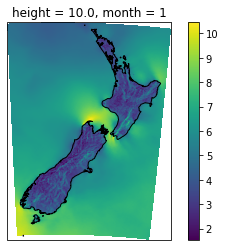

In [152]:
ws_monthavg10m_map(u, v) #Mapping function output